# CRIME RATE IN CHICAGO

We are going to predicting crime rate in chicago with Facebook Prophet.

Our dataset contains a summary of the reported crimes occurred in the City of Chicago from 2001 to 2017 and contains the following columns: 

   * **ID:** Unique identifier for the record.
   * **Case Number:** The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
   * **Date:** Date when the incident occurred.
   * **Block:** address where the incident occurred
   * **IUCR:** The Illinois Unifrom Crime Reporting code.
   * **Primary Type:** The primary description of the IUCR code.
   * **Description:** The secondary description of the IUCR code, a subcategory of the primary description.
   * **Location Description:** Description of the location where the incident occurred.
   * **Arrest:** Indicates whether an arrest was made.
   * **Domestic:** Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
   * **Beat:** Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. 
   * **District:** Indicates the police district where the incident occurred. 
   * **Ward:** The ward (City Council district) where the incident occurred. 
   * **Community Area:** Indicates the community area where the incident occurred. Chicago has 77 community areas. 
   * **FBI Code:** Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). 
   * **X Coordinate:** The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
   * **Y Coordinate:** The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
   * **Year:** Year the incident occurred.
   * **Updated On:** Date and time the record was last updated.
   * **Latitude:** The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
   * **Longitude:** The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
   * **Location:** The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

***Data source:*** https://www.kaggle.com/currie32/crimes-in-chicago

### Prophet

Prophet is open source software released by *Facebook’s Core Data Science team*.

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. 

In this link you have more information about Prophet with Python: https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api


# 1 - Import libraries and dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

In [2]:
df_1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False)
df_2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
df_3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
df_4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
/home/david/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:
# Concatenaning all datasets
df = pd.concat([df_1, df_2, df_3, df_4], ignore_index=False, axis=0)

In [4]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


# 2 - Missing values

In [5]:
# Let's see how many null elements are contained in the data
total = df.isnull().sum().sort_values(ascending=False) 
# missing values percentage
percent = ((df.isnull().sum())*100)/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
Community Area,702091,8.841028
Ward,700224,8.817518
Location,105574,1.329433
Longitude,105574,1.329433
Latitude,105573,1.329420
Y Coordinate,105573,1.329420
X Coordinate,105573,1.329420
Location Description,1990,0.025059
District,91,0.001146
Case Number,7,0.000088


**- Dropping unnamed:**

In [6]:
df.drop(['Unnamed: 0', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)
df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4786321,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,4676906,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,4789749,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,4789765,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,4677901,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
...,...,...,...,...,...,...,...,...
1456709,10508679,05/03/2016 11:33:00 PM,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1456710,10508680,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
1456711,10508681,05/03/2016 12:15:00 AM,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,10508690,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


**- Assembling a datetime:**

In [7]:
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [9]:
df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4786321,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,4676906,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,4789749,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,4789765,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,4677901,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


**- Change the index to the date:**

In [10]:
df.index = pd.DatetimeIndex(df.Date)
df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2004-01-01 00:01:00,4786321,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
2003-03-01 00:00:00,4676906,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2004-06-20 11:00:00,4789749,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
2004-12-30 20:00:00,4789765,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
2003-05-01 01:00:00,4677901,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


## Primary Type visualization

In [12]:
df['Primary Type'].value_counts().iloc[:15]

THEFT                         1640506
BATTERY                       1442716
CRIMINAL DAMAGE                923000
NARCOTICS                      885431
OTHER OFFENSE                  491922
ASSAULT                        481661
BURGLARY                       470958
MOTOR VEHICLE THEFT            370548
ROBBERY                        300453
DECEPTIVE PRACTICE             280931
CRIMINAL TRESPASS              229366
PROSTITUTION                    86401
WEAPONS VIOLATION               77429
PUBLIC PEACE VIOLATION          58548
OFFENSE INVOLVING CHILDREN      51441
Name: Primary Type, dtype: int64

In [13]:
df['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE',
       'ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

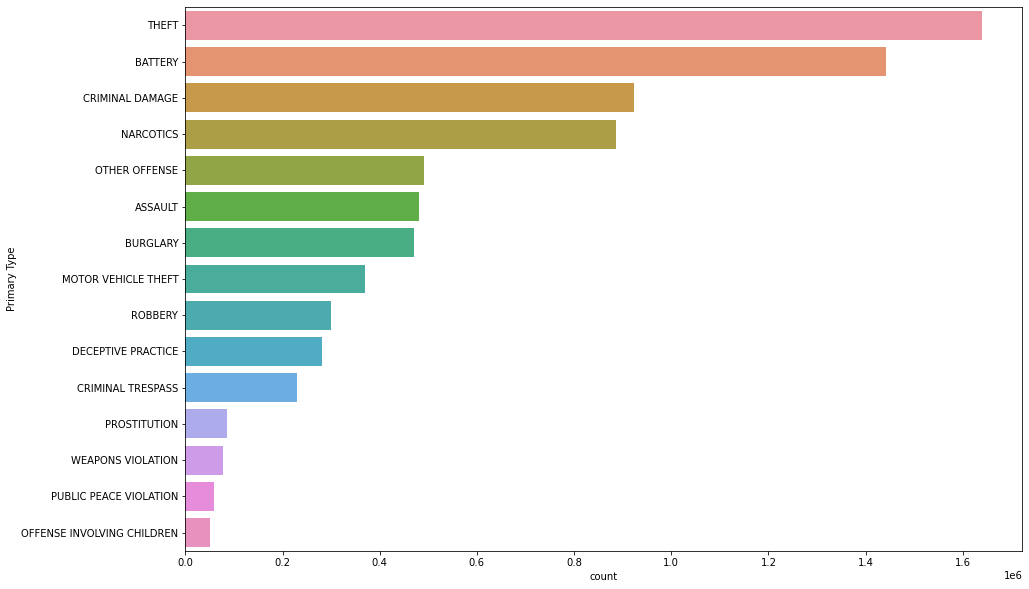

In [14]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = df, order = df['Primary Type'].value_counts().iloc[:15].index)

## Location Description visualization

<AxesSubplot:xlabel='count', ylabel='Location Description'>

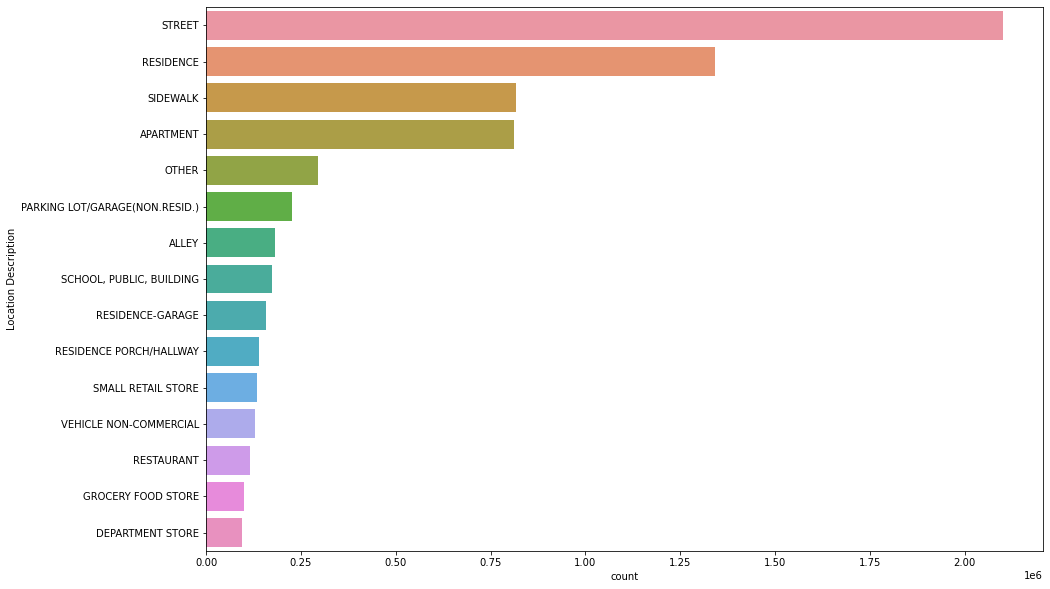

In [15]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:15].index)

# 3 - Data resample

Resample is a Convenience method for frequency conversion and resampling of time series. 

More info here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html

**- Per year:**

In [16]:
df.resample('Y').size()

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

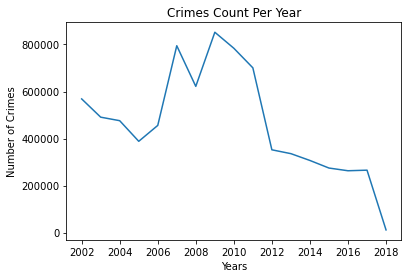

In [17]:
plt.plot(df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

**- Per month:**

In [18]:
df.resample('M').size()

Date
2001-01-31    74995
2001-02-28    66288
2001-03-31    53122
2001-04-30    40166
2001-05-31    41876
              ...  
2016-09-30    23235
2016-10-31    23314
2016-11-30    21140
2016-12-31    19580
2017-01-31    11357
Freq: M, Length: 193, dtype: int64

Text(0, 0.5, 'Number of Crimes')

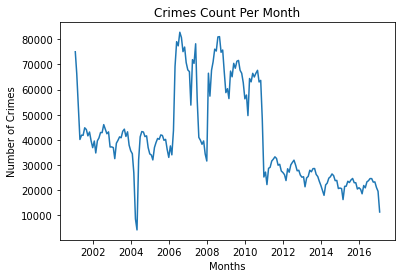

In [19]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

# 5 - Data Preparation

In [21]:
df_prophet = df.resample('M').size().reset_index()
df_prophet

,Date,0
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [22]:
df_prophet.columns = ['Date', 'Crime Count']
df_prophet.head()

,Date,Crime Count
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876


In [23]:
df_prophet = pd.DataFrame(df_prophet)
df_prophet

,Date,Crime Count
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


# 6 - Predictions with Prophet

In [24]:
df_prophet.columns

Index(['Date', 'Crime Count'], dtype='object')

In [25]:
df_prophet_final = df_prophet.rename(columns={'Date':'ds', 'Crime Count':'y'})
df_prophet_final.head()

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876


In [26]:
m = Prophet()
m.fit(df_prophet_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [28]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40559.731540,23628.244005,54258.118231,40559.731540,40559.731540,-1574.911817,-1574.911817,-1574.911817,-1574.911817,-1574.911817,-1574.911817,0.0,0.0,0.0,38984.819723
1,2001-02-28,40707.006266,18547.567086,49988.578194,40707.006266,40707.006266,-6454.662746,-6454.662746,-6454.662746,-6454.662746,-6454.662746,-6454.662746,0.0,0.0,0.0,34252.343520
2,2001-03-31,40870.060427,21495.169543,55202.417261,40870.060427,40870.060427,-2068.155039,-2068.155039,-2068.155039,-2068.155039,-2068.155039,-2068.155039,0.0,0.0,0.0,38801.905388
3,2001-04-30,41027.854775,23281.051427,53789.296148,41027.854775,41027.854775,-1473.221009,-1473.221009,-1473.221009,-1473.221009,-1473.221009,-1473.221009,0.0,0.0,0.0,39554.633766
4,2001-05-31,41190.908936,29675.632094,61543.960585,41190.908936,41190.908936,3883.204571,3883.204571,3883.204571,3883.204571,3883.204571,3883.204571,0.0,0.0,0.0,45074.113507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,2018-01-27,9114.477200,-11154.856735,21864.404720,8834.763543,9395.155285,-3423.766249,-3423.766249,-3423.766249,-3423.766249,-3423.766249,-3423.766249,0.0,0.0,0.0,5690.710951
554,2018-01-28,9100.488430,-8934.453537,23419.424189,8819.513188,9382.545758,-2770.269732,-2770.269732,-2770.269732,-2770.269732,-2770.269732,-2770.269732,0.0,0.0,0.0,6330.218698
555,2018-01-29,9086.499659,-8341.707573,22854.628784,8804.262834,9369.895953,-2232.904204,-2232.904204,-2232.904204,-2232.904204,-2232.904204,-2232.904204,0.0,0.0,0.0,6853.595455
556,2018-01-30,9072.510889,-8308.241536,22550.218800,8789.291815,9357.246149,-1837.148931,-1837.148931,-1837.148931,-1837.148931,-1837.148931,-1837.148931,0.0,0.0,0.0,7235.361958


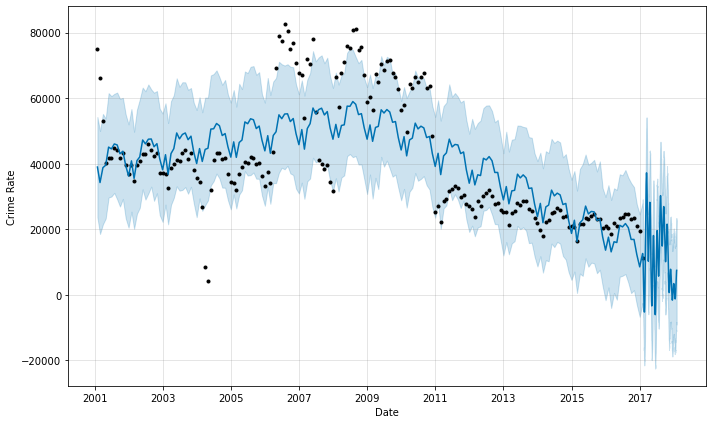

In [29]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

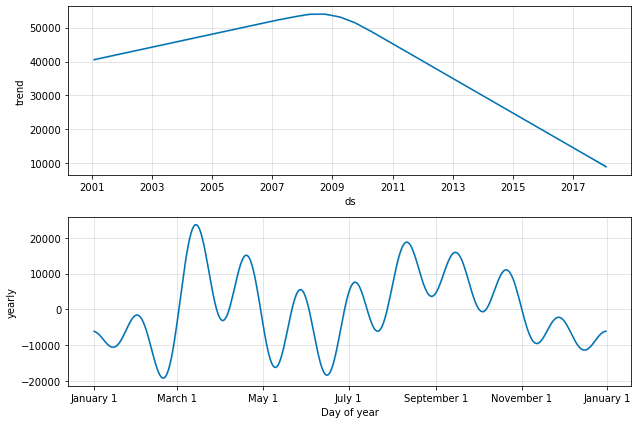

In [32]:
figure2 = m.plot_components(forecast)

We can see the prediction with prophet is right and we could predict crime rate in Chicago for next years with some precision.